##### Step 1 - Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

##### Step 2 - Import data and create a pandas dataframe

In [2]:
df = pd.read_csv(r'data/marketing-data.csv')

### PREPROCESS

##### Step 3 - Get general information of the dataset

In [3]:
# Use the head() method to display the first few rows of the data.
df.head()

,Campaign_ID,Channel,Product_Category,Region,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Start_Date,End_Date,Customer_Satisfaction,Campaign_Effectiveness,Market_Segment
0,CAM0001,Billboard,Fashion,Kuala Lumpur,484341.0,197038.0,545901.0,NaN,0.0785,7993.0,0.3414,849005.0,0.64,212.0,2/3/2023,23/12/2023,3.0,3.0,Medium
1,CAM0002,NaN,Health,Sarawak,468792.0,33743.0,527513.0,4130.0,0.9479,9459.0,NaN,921078.0,3.78,29.0,NaN,NaN,3.0,7.0,Medium
2,CAM0003,Radio,Electronics,Penang,10487.0,6745.0,806911.0,12209.0,NaN,7168.0,0.0517,51142.0,3.64,74.0,12/4/2023,20/10/2023,1.0,2.0,Medium
3,CAM0004,Email,Electronics,Penang,345431.0,329112.0,108570.0,34391.0,0.6157,7190.0,0.3579,191887.0,2.64,67.0,24/4/2023,26/1/2023,5.0,6.0,High
4,CAM0005,Radio,Fashion,Kuala Lumpur,322345.0,34365.0,799855.0,13056.0,NaN,1794.0,0.0544,167241.0,1.02,40.0,10/1/2023,1/1/2023,5.0,6.0,Low


In [4]:
# Use the tail() method to display the last few rows of the data.
df.tail()

,Campaign_ID,Channel,Product_Category,Region,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Start_Date,End_Date,Customer_Satisfaction,Campaign_Effectiveness,Market_Segment
4995,CAM4996,Email,Automotive,Kuala Lumpur,373204.0,239182.0,947505.000,27359.0,0.4446,2725.0,0.1643,739721.0,17.287862,170.0,4/4/2023,15/12/2023,4.0,5.0,Low
4996,CAM4997,Radio,Electronics,Kuala Lumpur,81357.0,381641.0,270685.000,2575.0,0.8224,1555.0,0.2425,324435.0,1.500000,148.0,28/1/2023,26/12/2023,2.0,7.0,Low
4997,CAM4998,Radio,NaN,Kuala Lumpur,216060.0,122475.0,6042568.044,42563.0,0.5894,NaN,NaN,647246.0,NaN,340.0,7/6/2023,6/12/2023,3.0,5.0,NaN
4998,CAM4999,Social Media,Electronics,Kuala Lumpur,120531.0,433558.0,857140.000,7037.0,0.2863,3374.0,0.9039,373110.0,0.390000,76.0,2/11/2023,23/8/2023,2.0,1.0,Medium
4999,CAM5000,TV,Automotive,Sabah,476378.0,261529.0,308009.000,45922.0,0.5187,3047.0,0.0438,146303.0,0.770000,330.0,1/1/2023,6/11/2023,1.0,1.0,High


In [5]:
#make a code to count value of the region column   
df['Region'].value_counts()

Region
Kuala Lumpur    988
Sarawak         975
Sabah           927
Penang          922
Johor           914
Malacca          13
Name: count, dtype: int64

In [6]:
#show me the highest value of the Campaign_Effectiveness column
df['Campaign_Effectiveness'].max()


88.91494937

In [7]:
#Use the shape attribute to display the number of rows and columns in the data.
df.shape

(5000, 19)

##### Step 4 - Data cleansing

"Data cleansing or data cleaning is the process of identifying and correcting (or removing) corrupt, inaccurate, or irrelevant records from a dataset, table, or database. It involves detecting incomplete, incorrect, or inaccurate parts of the data and then replacing, modifying, or deleting the affected data." Wu, S. (2013)

In [8]:
#Use the duplicated() method to count the number of duplicate rows in the data.
#We see that there are no duplicate rows in the data.
duplicated = df.duplicated().sum()
int(duplicated)

0

In [9]:
#Use isnull() and sum() methods to count the number of missing values in each column.
isnull = df.isnull().sum()
isnull

Campaign_ID               259
Channel                   254
Product_Category          267
Region                    261
Budget                    500
Spend                     499
Impressions               504
Clicks                    486
CTR                       498
Conversions               494
CR                        496
Revenue                   509
ROI                       495
Duration                  479
Start_Date                259
End_Date                  257
Customer_Satisfaction     492
Campaign_Effectiveness    490
Market_Segment            262
dtype: int64

#### Using a heatmap to visualize missing values

<Axes: >

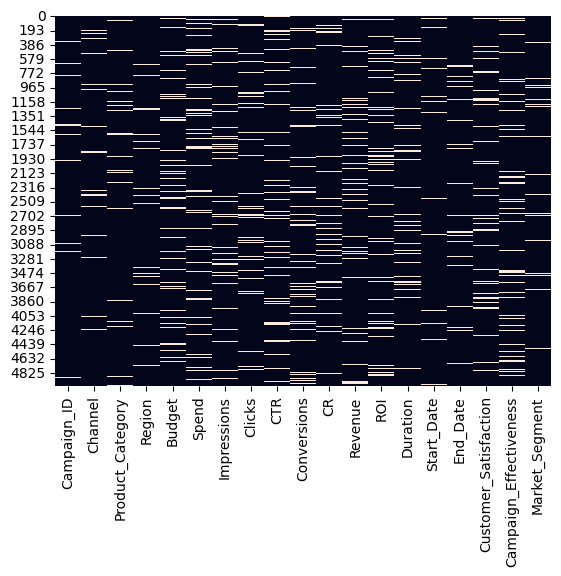

In [10]:
#Use a heatmap to visualize the missing values in the data.
sns.heatmap(df.isnull(), cbar=False)

In [11]:
#Use the isnull() and sum() methods to calculate the percentage of missing values in each column. 
#This will tell us if there are any columns with a high percentage of missing values.
#As a rule of thumb, columns with more than 30% missing values are usually removed from the data. 
df.isnull().sum() / df.shape[0] * 100

Campaign_ID                5.18
Channel                    5.08
Product_Category           5.34
Region                     5.22
Budget                    10.00
Spend                      9.98
Impressions               10.08
Clicks                     9.72
CTR                        9.96
Conversions                9.88
CR                         9.92
Revenue                   10.18
ROI                        9.90
Duration                   9.58
Start_Date                 5.18
End_Date                   5.14
Customer_Satisfaction      9.84
Campaign_Effectiveness     9.80
Market_Segment             5.24
dtype: float64

### Fixing the null values

##### Campaign_ID null values

In [12]:
#Since the campaign_id column follows a pattern, we can fill in the missing values easily.
df['Campaign_ID'].fillna(df.index.to_series().apply(lambda x: f'CAM{x+1:04d}'), inplace=True)

In [13]:
#As we can see, the missing values in the Campaign_ID column have been filled in and there are no missing values in the column.
isnull = df.isnull().sum()
isnull

Campaign_ID                 0
Channel                   254
Product_Category          267
Region                    261
Budget                    500
Spend                     499
Impressions               504
Clicks                    486
CTR                       498
Conversions               494
CR                        496
Revenue                   509
ROI                       495
Duration                  479
Start_Date                259
End_Date                  257
Customer_Satisfaction     492
Campaign_Effectiveness    490
Market_Segment            262
dtype: int64

#### Start_date, End_date and Duration columns' null values

In [14]:
#To fix the missing values in the Start_Date, End_Date columns and Duration columns, we can follow these steps:

# Convert columns to datetime
df['Start_Date'] = pd.to_datetime(df['Start_Date'], format='%d/%m/%Y', errors='coerce')
df['End_Date'] = pd.to_datetime(df['End_Date'], format='%d/%m/%Y', errors='coerce')

# Fill in missing values based on available data
# Case 1: If both Start_Date and End_Date are known, calculate Duration (absolute value)
df.loc[df['Duration'].isnull() & df['Start_Date'].notnull() & df['End_Date'].notnull(), 'Duration'] = (
    (df['End_Date'] - df['Start_Date']).abs().dt.days  # Convert to absolute number of days
)

# Case 2: If Start_Date and Duration are known, calculate End_Date
df.loc[df['End_Date'].isnull() & df['Start_Date'].notnull() & df['Duration'].notnull(), 'End_Date'] = (
    df['Start_Date'] + pd.to_timedelta(df['Duration'].abs(), unit='D')  # Ensure Duration is positive
)

# Case 3: If End_Date and Duration are known, calculate Start_Date
df.loc[df['Start_Date'].isnull() & df['End_Date'].notnull() & df['Duration'].notnull(), 'Start_Date'] = (
    df['End_Date'] - pd.to_timedelta(df['Duration'].abs(), unit='D')  # Ensure Duration is positive
)

This has reduced the number of null rows in these columns signifcantly. However, as there are some rows where we do not have neither the Start_Date nor the End_Date, it's not possible to get the duration. To solve this, we'll fill those rows with either the average, the median or the mode.

In [15]:
#Getting the average of the duration column
avg_duration = df['Duration'].mean().round(2)

#Getting the median of the duration column
median_duration = df['Duration'].median().round(2)

#Gett the mode of the duration column
mode_duration = df['Duration'].mode().round(2)

print('Average Duration:', avg_duration)
print('Median Duration:', median_duration)
print('Mode Duration:', mode_duration)

Average Duration: 194.28
Median Duration: 182.0
Mode Duration: 0    115.0
Name: Duration, dtype: float64


In this case, each of the central tendency values (median, mean, and mode) provides different insights:

Mean (194): Reflects the overall average but may be skewed by extreme values.

Median (182): Represents the midpoint of the data and is generally robust to outliers, providing a good balance for skewed distributions.

Mode (115): The most frequently occurring duration, useful if a significant portion of campaigns tend to last around this length.

Since we only need to fill in 38 rows (less than 1% of our data), using the median (182) would be a strong choice here. The median is less affected by outliers than the mean and often provides a more balanced approach, especially when the mean and median are relatively close, as they are here.

In [16]:
#We fill the missing values in the Duration column with the median value.
df['Duration'].fillna(median_duration, inplace=True)

Now that we've filled the Duration column completely, we can use that information to fill some of the missing Start_Date and End_Date values.

In [17]:
# Case 1: If Start_Date and Duration are known, calculate End_Date
df.loc[df['End_Date'].isnull() & df['Start_Date'].notnull() & df['Duration'].notnull(), 'End_Date'] = (
    df['Start_Date'] + pd.to_timedelta(df['Duration'].abs(), unit='D')  # Ensure Duration is positive
)

# Case 2: If End_Date and Duration are known, calculate Start_Date
df.loc[df['Start_Date'].isnull() & df['End_Date'].notnull() & df['Duration'].notnull(), 'Start_Date'] = (
    df['End_Date'] - pd.to_timedelta(df['Duration'].abs(), unit='D')  # Ensure Duration is positive
)

To deal with the last 14 rows that have missing start and end date values, we'll generate random dates from the year 2023 but the dates must take the Duration column into consideration. We do it this way because 14 rows only account for 0.28% of the data. And if we use the median or mode for the dates separately, the dates will not coincide with the duration.

In [18]:
def fill_dates(row):
    if pd.isnull(row['Start_Date']) or pd.isnull(row['End_Date']):
        duration = row['Duration']
        
        # Generate a random Start_Date in 2023
        start_date = pd.Timestamp('2023-01-01') + pd.to_timedelta(np.random.randint(0, 365), unit='D')
        
        # Calculate End_Date based on Duration
        end_date = start_date + pd.to_timedelta(duration, unit='D')

        # Ensure both dates are within 2023
        if end_date > pd.Timestamp('2023-12-31'):
            # If End_Date exceeds, adjust Start_Date to fit
            start_date = pd.Timestamp('2023-12-31') - pd.to_timedelta(duration, unit='D')
            end_date = pd.Timestamp('2023-12-31')

        return pd.Series([start_date, end_date])
    else:
        return pd.Series([row['Start_Date'], row['End_Date']])

# Apply the function to fill missing dates
df[['Start_Date', 'End_Date']] = df.apply(fill_dates, axis=1)

In [19]:
#With this, we've removed the missing values in the Start_Date, End_Date, and Duration columns.
isnull = df.isnull().sum()
isnull

Campaign_ID                 0
Channel                   254
Product_Category          267
Region                    261
Budget                    500
Spend                     499
Impressions               504
Clicks                    486
CTR                       498
Conversions               494
CR                        496
Revenue                   509
ROI                       495
Duration                    0
Start_Date                  0
End_Date                    0
Customer_Satisfaction     492
Campaign_Effectiveness    490
Market_Segment            262
dtype: int64

In [20]:
df.head()

,Campaign_ID,Channel,Product_Category,Region,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Start_Date,End_Date,Customer_Satisfaction,Campaign_Effectiveness,Market_Segment
0,CAM0001,Billboard,Fashion,Kuala Lumpur,484341.0,197038.0,545901.0,NaN,0.0785,7993.0,0.3414,849005.0,0.64,212.0,2023-03-02,2023-12-23,3.0,3.0,Medium
1,CAM0002,NaN,Health,Sarawak,468792.0,33743.0,527513.0,4130.0,0.9479,9459.0,NaN,921078.0,3.78,29.0,2023-05-26,2023-06-24,3.0,7.0,Medium
2,CAM0003,Radio,Electronics,Penang,10487.0,6745.0,806911.0,12209.0,NaN,7168.0,0.0517,51142.0,3.64,74.0,2023-04-12,2023-10-20,1.0,2.0,Medium
3,CAM0004,Email,Electronics,Penang,345431.0,329112.0,108570.0,34391.0,0.6157,7190.0,0.3579,191887.0,2.64,67.0,2023-04-24,2023-01-26,5.0,6.0,High
4,CAM0005,Radio,Fashion,Kuala Lumpur,322345.0,34365.0,799855.0,13056.0,NaN,1794.0,0.0544,167241.0,1.02,40.0,2023-01-10,2023-01-01,5.0,6.0,Low


For the rest of the categorical columns, we will check the value counts to see how many times each value appears.

In [21]:
#check the value counts for all columns that contain categorical data
for column in df.select_dtypes(include='object'):
    if column != 'Campaign_ID':
        print(df[column].value_counts())

Channel
Billboard       990
Social Media    970
Radio           960
Email           928
TV              892
News              6
Name: count, dtype: int64
Product_Category
Electronics    978
Groceries      972
Health         951
Automotive     932
Fashion        900
Name: count, dtype: int64
Region
Kuala Lumpur    988
Sarawak         975
Sabah           927
Penang          922
Johor           914
Malacca          13
Name: count, dtype: int64
Market_Segment
High      1601
Medium    1592
Low       1545
Name: count, dtype: int64


In [22]:
#We fill the null values from the columns with categorial data using the mode
for column in df.select_dtypes(include='object'):
    if column != 'Campaign_ID':
        df[column].fillna(df[column].mode()[0], inplace=True)

In [23]:
#Now the categorical columns have no missing values
isnull = df.isnull().sum()
isnull

Campaign_ID                 0
Channel                     0
Product_Category            0
Region                      0
Budget                    500
Spend                     499
Impressions               504
Clicks                    486
CTR                       498
Conversions               494
CR                        496
Revenue                   509
ROI                       495
Duration                    0
Start_Date                  0
End_Date                    0
Customer_Satisfaction     492
Campaign_Effectiveness    490
Market_Segment              0
dtype: int64

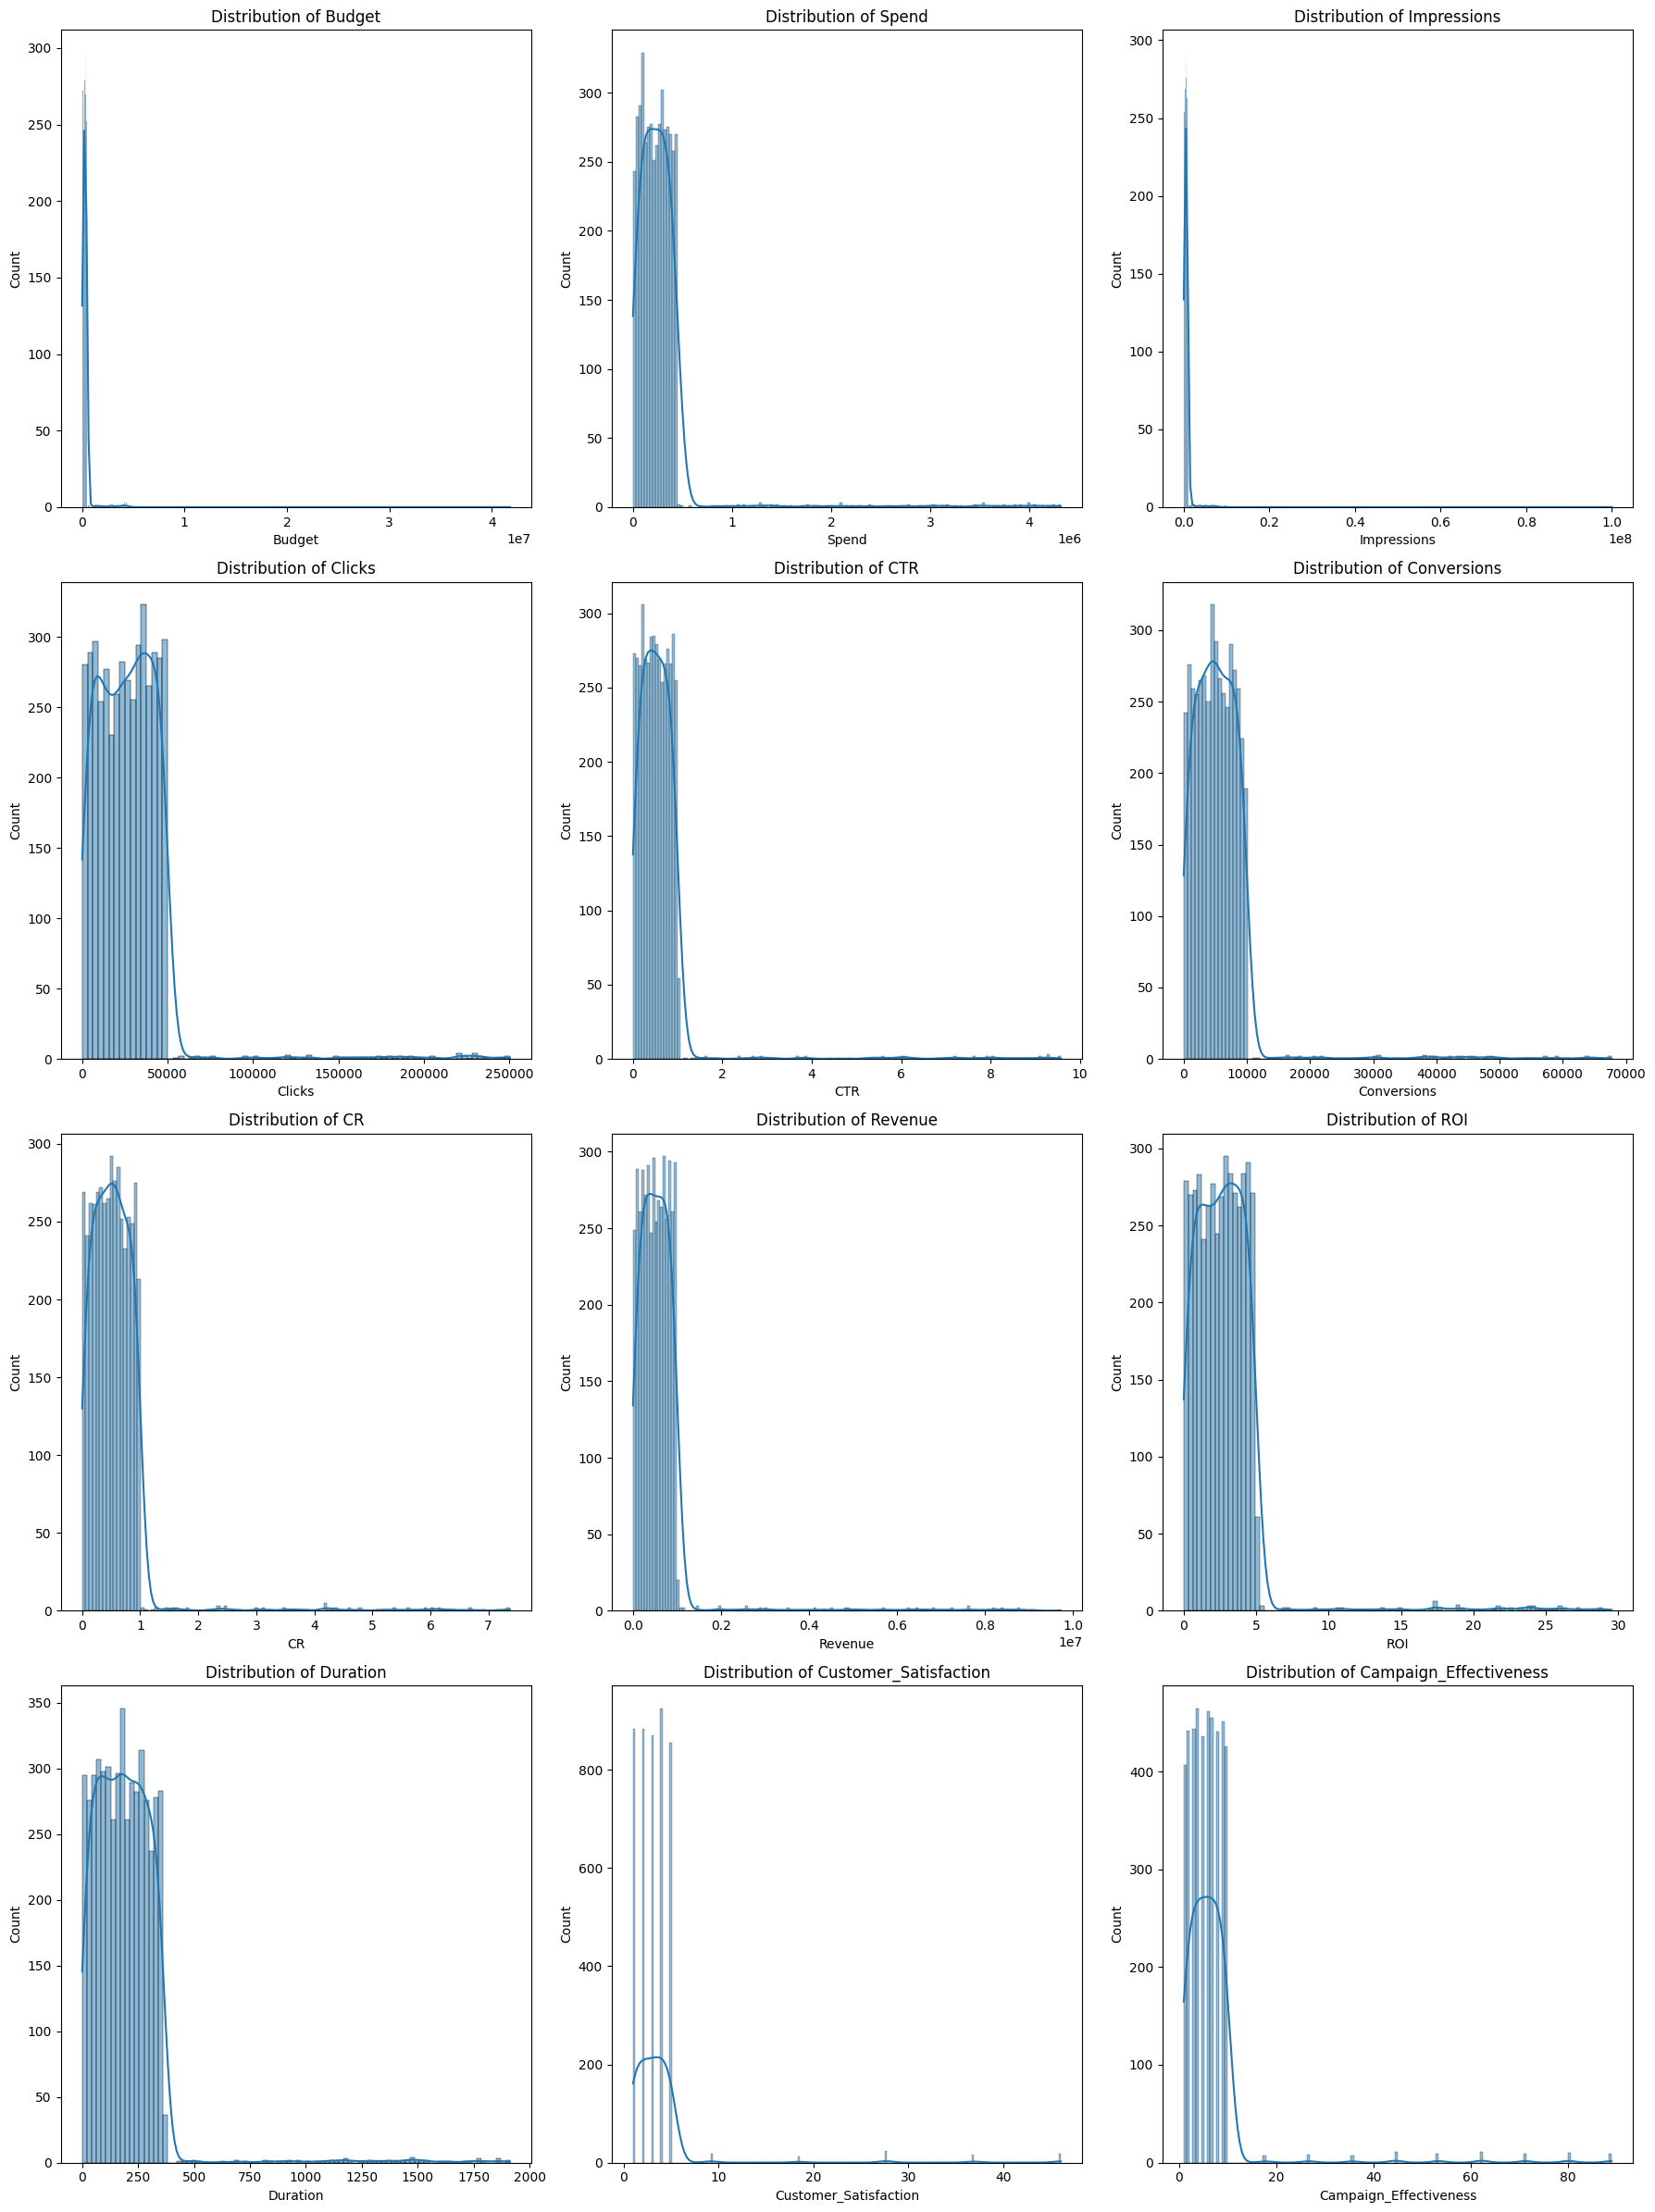

In [29]:
"""#create bar charts to show the distribution of the numerical columns
for column in df.select_dtypes(include='number'):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()"""

# Select numerical columns
numerical_columns = df.select_dtypes(include='number').columns

# Determine the number of rows and columns for the subplots
num_columns = len(numerical_columns)
num_rows = (num_columns + 2) // 3  # Adjust the number of columns per row as needed

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create separate histograms for each numerical column
for i, column in enumerate(numerical_columns):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


In [24]:
# Select numerical columns
"""numerical_columns = df.select_dtypes(include=['number']).columns

# Determine the number of rows and columns for the subplots
num_columns = len(numerical_columns)
num_rows = (num_columns + 2) // 3  # Adjust the number of columns per row as needed

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create separate box plots for each numerical column
for i, column in enumerate(numerical_columns):
    df.boxplot(column=column, kind= ax=axes[i])
    axes[i].set_title(f'Box plot of {column}')
    axes[i].set_yscale('log')  # Optional: Set y-axis to logarithmic scale if needed

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()"""


"numerical_columns = df.select_dtypes(include=['number']).columns\n\n# Determine the number of rows and columns for the subplots\nnum_columns = len(numerical_columns)\nnum_rows = (num_columns + 2) // 3  # Adjust the number of columns per row as needed\n\n# Create a figure and subplots\nfig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))\n\n# Flatten the axes array for easy iteration\naxes = axes.flatten()\n\n# Create separate box plots for each numerical column\nfor i, column in enumerate(numerical_columns):\n    df.boxplot(column=column, kind= ax=axes[i])\n    axes[i].set_title(f'Box plot of {column}')\n    axes[i].set_yscale('log')  # Optional: Set y-axis to logarithmic scale if needed\n\n# Remove any unused subplots\nfor j in range(i + 1, len(axes)):\n    fig.delaxes(axes[j])\n\n# Adjust layout\nplt.tight_layout()\nplt.show()"

#### Check correlation between columns

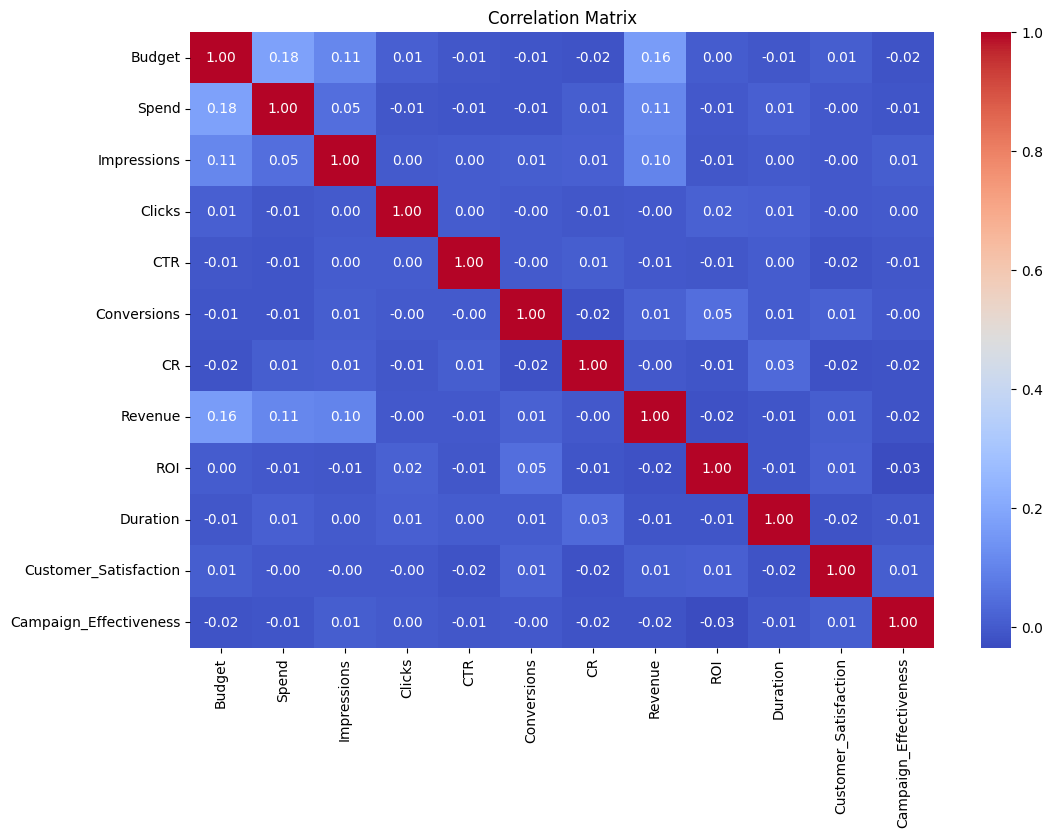

In [25]:
#We can creat a heatmap to visualize the correlation between the columns in the data.

# Exclude non-numeric columns from correlation calculation
numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [26]:
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

categorical_columns = ['Channel', 'Product_Category', 'Region', 'Market_Segment']

correlation_matrix_categorical = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        correlation_matrix_categorical.loc[col1, col2] = cramers_v(df[col1], df[col2])

correlation_matrix_categorical

,Channel,Product_Category,Region,Market_Segment
Channel,1.0,0.0,0.047766,0.0
Product_Category,0.0,1.0,0.017861,0.0
Region,0.047766,0.017861,1.0,0.0
Market_Segment,0.0,0.0,0.0,1.0
